In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import joblib
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Drop unwanted columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [8]:
# Target Encoding on diagnosis
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [10]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

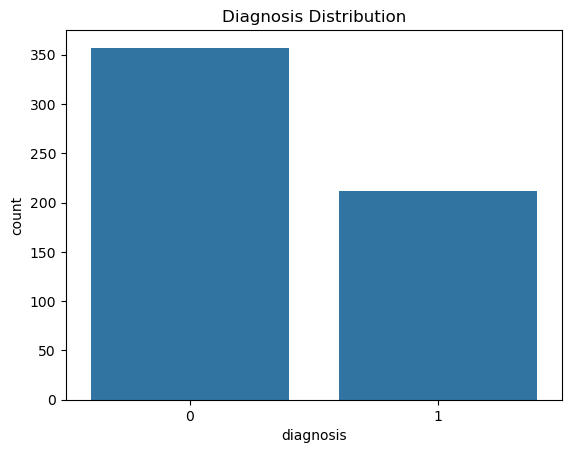

In [11]:
# Check imbalancing
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution')
plt.show()

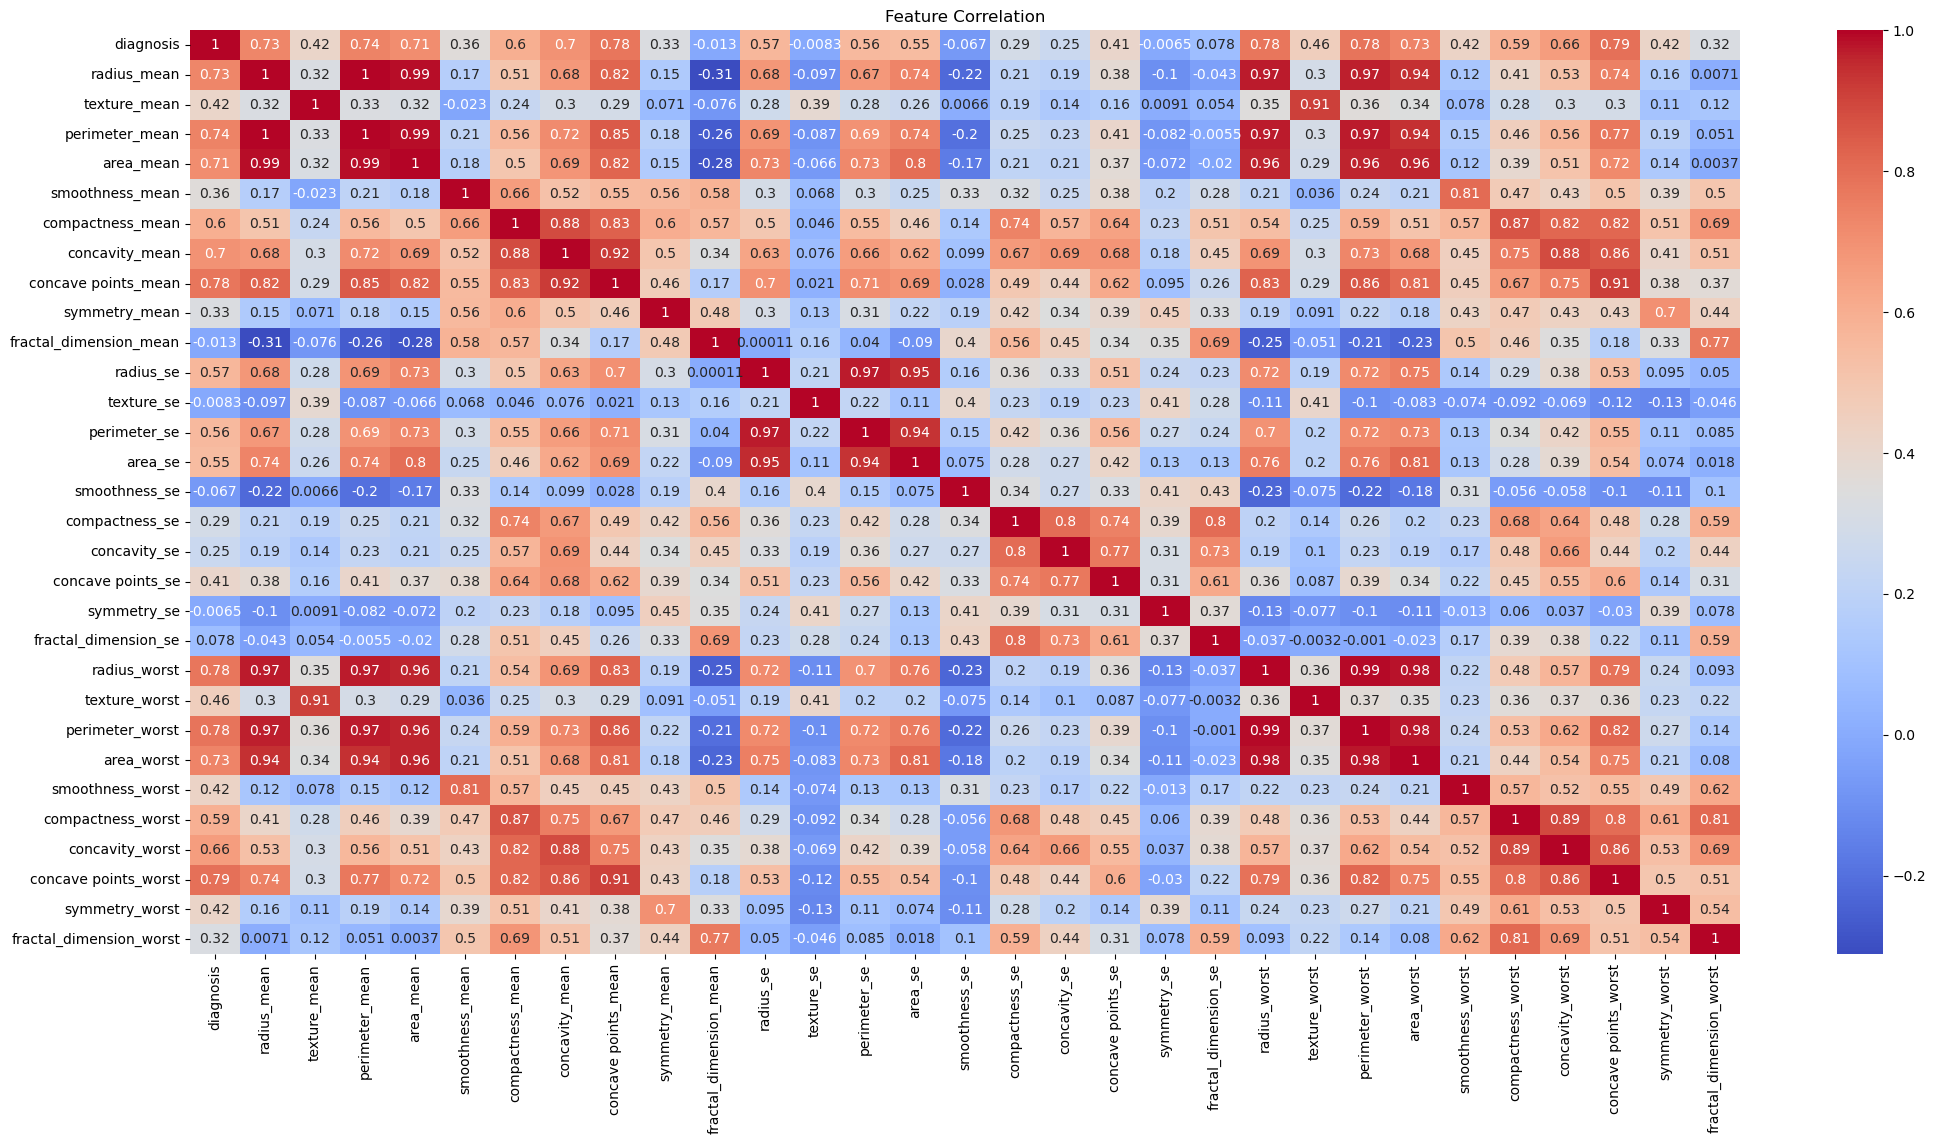

In [12]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")

Confusion Matrix (Test Data):
[[70  1]
 [ 3 40]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Training Accuracy: 1.0000
Testing Accuracy : 0.9649


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



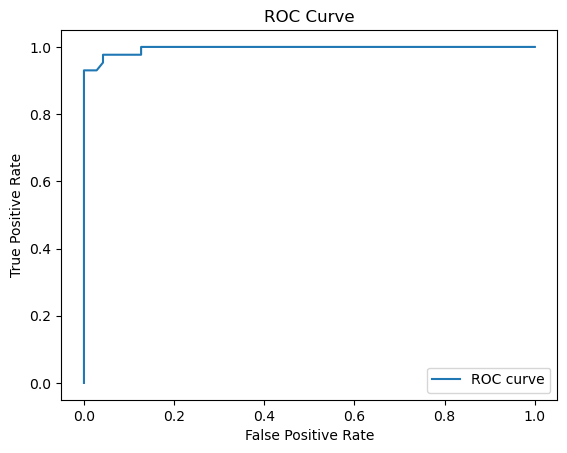

ROC AUC Score: 0.995250573206682


In [15]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

In [16]:
joblib.dump(model, 'breast_cancer_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [17]:
model = joblib.load('breast_cancer_model.pkl')
scaler = joblib.load('scaler.pkl')
sample_input = [[21.2, 23.5, 142.3, 1450.0, 0.145,
                 0.28, 0.30, 0.17, 0.28, 0.09,
                 1.3, 1.0, 9.0, 220.0, 0.008,
                 0.06, 0.08, 0.025, 0.05, 0.012,
                 26.5, 29.1, 178.0, 2450.0, 0.19,
                 0.42, 0.45, 0.23, 0.38, 0.125]]
sample_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_scaled)[0]
if prediction == 1:
    print("Prediction: Malignant")
else:
    print("Prediction: Benign")

Prediction: Malignant


In [18]:
sample_input = [[14.85, 13.5, 95.2, 678.0, 0.089,
                 0.065, 0.045, 0.03, 0.18, 0.058,
                 0.32, 1.0, 2.3, 28.0, 0.0055,
                 0.014, 0.018, 0.008, 0.012, 0.002,
                 16.1, 16.3, 105.0, 820.0, 0.105,
                 0.12, 0.14, 0.08, 0.22, 0.065]]
sample_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_scaled)[0]
if prediction == 1:
    print("Prediction: Malignant")
else:
    print("Prediction: Benign")

Prediction: Benign
